In [ ]:
import pandas as pd

NBA = pd.read_csv("hf://datasets/suzyanil/nba-data/nba_games_stats.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
NBA.to_csv("NBA_dataset.csv", index=False)

In [ ]:
import pandas as pd

# Filter columns to exclude
excluded_columns = ["Unnamed: 0", "Team", "Game", "Date", "Home", "Opponent", "WINorLOSS"]
filtered_columns = [col for col in NBA.columns if col not in excluded_columns]

# Initialize an empty dictionary to store the results
statistics = {}

# Calculate the desired statistics for each filtered column
for col in filtered_columns:
    col_data = NBA[col].dropna()  # Remove any NaN values for calculations
    sample_size = len(col_data)
    mean = col_data.mean()
    std_dev = col_data.std()
    min_val = col_data.min()
    q1 = col_data.quantile(0.25)
    q2 = col_data.median()
    q3 = col_data.quantile(0.75)
    max_val = col_data.max()

    # Store the results in the dictionary
    statistics[col] = {
        "Sample Size": sample_size,
        "Mean": mean,
        "Standard Deviation": std_dev,
        "5-Number Summary": {
            "Min": min_val,
            "Q1": q1,
            "Median (Q2)": q2,
            "Q3": q3,
            "Max": max_val
        }
    }

# Display the results
for col, stats in statistics.items():
    print(f"\nColumn: {col}")
    print(f"Sample Size: {stats['Sample Size']}")
    print(f"Mean: {stats['Mean']}")
    print(f"Standard Deviation: {stats['Standard Deviation']}")
    print("5-Number Summary:")
    for key, value in stats["5-Number Summary"].items():
        print(f"  {key}: {value}")



Column: TeamPoints
Sample Size: 9840
Mean: 103.65233739837399
Standard Deviation: 12.188043065380828
5-Number Summary:
  Min: 64
  Q1: 95.0
  Median (Q2): 103.0
  Q3: 112.0
  Max: 149

Column: OpponentPoints
Sample Size: 9840
Mean: 103.65233739837399
Standard Deviation: 12.18804306538082
5-Number Summary:
  Min: 64
  Q1: 95.0
  Median (Q2): 103.0
  Q3: 112.0
  Max: 149

Column: FieldGoals
Sample Size: 9840
Mean: 38.60243902439024
Standard Deviation: 5.029991779809538
5-Number Summary:
  Min: 19
  Q1: 35.0
  Median (Q2): 38.0
  Q3: 42.0
  Max: 58

Column: FieldGoalsAttempted
Sample Size: 9840
Mean: 84.90243902439025
Standard Deviation: 7.1300433511437085
5-Number Summary:
  Min: 60
  Q1: 80.0
  Median (Q2): 85.0
  Q3: 89.0
  Max: 129

Column: FieldGoals.
Sample Size: 9840
Mean: 0.4556893292682927
Standard Deviation: 0.05471073650991719
5-Number Summary:
  Min: 0.271
  Q1: 0.418
  Median (Q2): 0.455
  Q3: 0.494
  Max: 0.684

Column: X3PointShots
Sample Size: 9840
Mean: 9.126829268292683

In [ ]:
# Define the columns for which you want to get sample size and category counts
categorical_columns = ["Team", "Home", "WINorLOSS"]

# Initialize an empty dictionary to store the results
category_statistics = {}

# Calculate the sample size and category counts for each specified column
for col in categorical_columns:
    col_data = NBA[col].dropna()  # Remove any NaN values for calculations
    sample_size = len(col_data)
    category_counts = col_data.value_counts().to_dict()

    # Store the results in the dictionary
    category_statistics[col] = {
        "Sample Size": sample_size,
        "Category Counts": category_counts
    }

# Display the results
for col, stats in category_statistics.items():
    print(f"\nColumn: {col}")
    print(f"Sample Size: {stats['Sample Size']}")
    print("Category Counts:")
    for category, count in stats["Category Counts"].items():
        print(f"  {category}: {count}")



Column: Team
Sample Size: 9840
Category Counts:
  ATL: 328
  BOS: 328
  UTA: 328
  TOR: 328
  SAS: 328
  SAC: 328
  POR: 328
  PHO: 328
  PHI: 328
  ORL: 328
  OKC: 328
  NYK: 328
  NOP: 328
  MIN: 328
  MIL: 328
  MIA: 328
  MEM: 328
  LAL: 328
  LAC: 328
  IND: 328
  HOU: 328
  GSW: 328
  DET: 328
  DEN: 328
  DAL: 328
  CLE: 328
  CHI: 328
  CHO: 328
  BRK: 328
  WAS: 328

Column: Home
Sample Size: 9840
Category Counts:
  Away: 4920
  Home: 4920

Column: WINorLOSS
Sample Size: 9840
Category Counts:
  L: 4920
  W: 4920


<ipython-input-6-aa2779ad3ae5>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NBA['Date'] = pd.to_datetime(NBA['Date'])


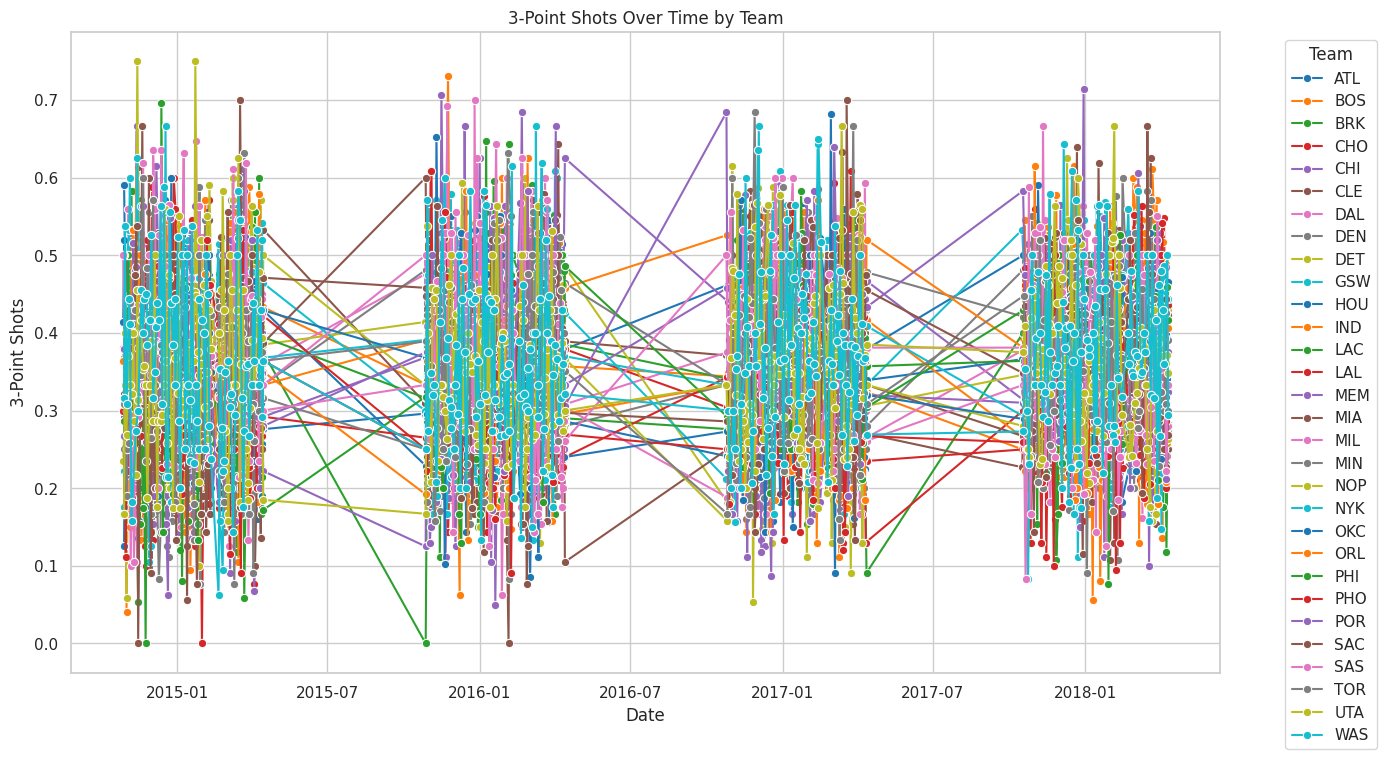

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that 'Date' is in datetime format
NBA['Date'] = pd.to_datetime(NBA['Date'])

# Set the style of the plot for better aesthetics
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(14, 8))

# Use seaborn's lineplot to handle different colors for each team
sns.lineplot(
    data=NBA,
    x="Date",
    y="X3PointShots.",
    hue="Team",
    palette="tab10",  # Use a color palette for distinct colors
    marker="o"  # Optional: add markers for each data point
)

# Set plot labels and title
plt.title("3-Point Shots Over Time by Team")
plt.xlabel("Date")
plt.ylabel("3-Point Shots")

# Position the legend on the right side of the plot
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()



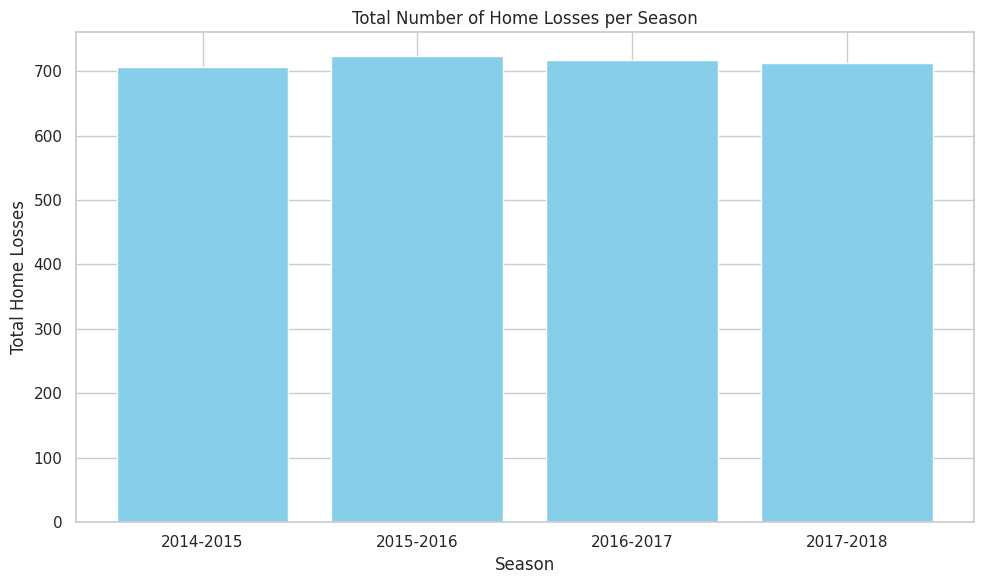

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
NBA['Date'] = pd.to_datetime(NBA['Date'])

# Define function to categorize each date into the appropriate season
def get_season(date):
    if date < pd.Timestamp("2015-07-01"):
        return "2014-2015"
    elif date < pd.Timestamp("2016-07-01"):
        return "2015-2016"
    elif date < pd.Timestamp("2017-07-01"):
        return "2016-2017"
    else:
        return "2017-2018"

# Apply the season categorization
NBA['Season'] = NBA['Date'].apply(get_season)

# Filter for home losses
home_losses = NBA[(NBA['Home'] == 'Home') & (NBA['WINorLOSS'] == 'W')]

# Group by Season and count the occurrences
loss_counts_by_season = home_losses.groupby('Season').size().reset_index(name='Total Home Losses')

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(loss_counts_by_season['Season'], loss_counts_by_season['Total Home Losses'], color='skyblue')

# Set labels and title
plt.title("Total Number of Home Losses per Season")
plt.xlabel("Season")
plt.ylabel("Total Home Losses")

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


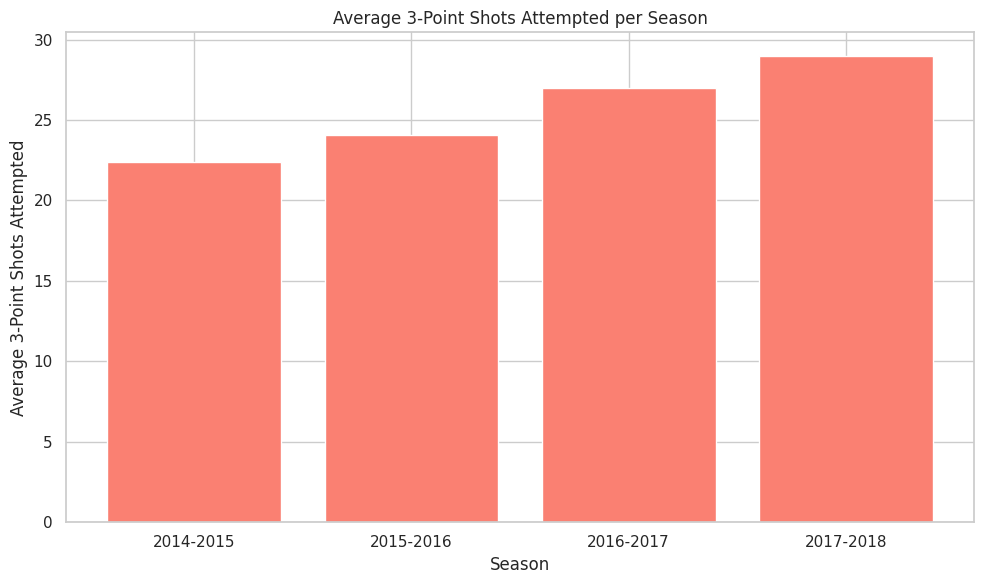

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
NBA['Date'] = pd.to_datetime(NBA['Date'])

# Define function to categorize each date into the appropriate season
def get_season(date):
    if date < pd.Timestamp("2015-07-01"):
        return "2014-2015"
    elif date < pd.Timestamp("2016-07-01"):
        return "2015-2016"
    elif date < pd.Timestamp("2017-07-01"):
        return "2016-2017"
    else:
        return "2017-2018"

# Apply the season categorization
NBA['Season'] = NBA['Date'].apply(get_season)

# Group by Season and calculate the mean of X3PointShotsAttempted for each season
average_3point_attempts = NBA.groupby('Season')['X3PointShotsAttempted'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_3point_attempts['Season'], average_3point_attempts['X3PointShotsAttempted'], color='salmon')

# Set labels and title
plt.title("Average 3-Point Shots Attempted per Season")
plt.xlabel("Season")
plt.ylabel("Average 3-Point Shots Attempted")

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


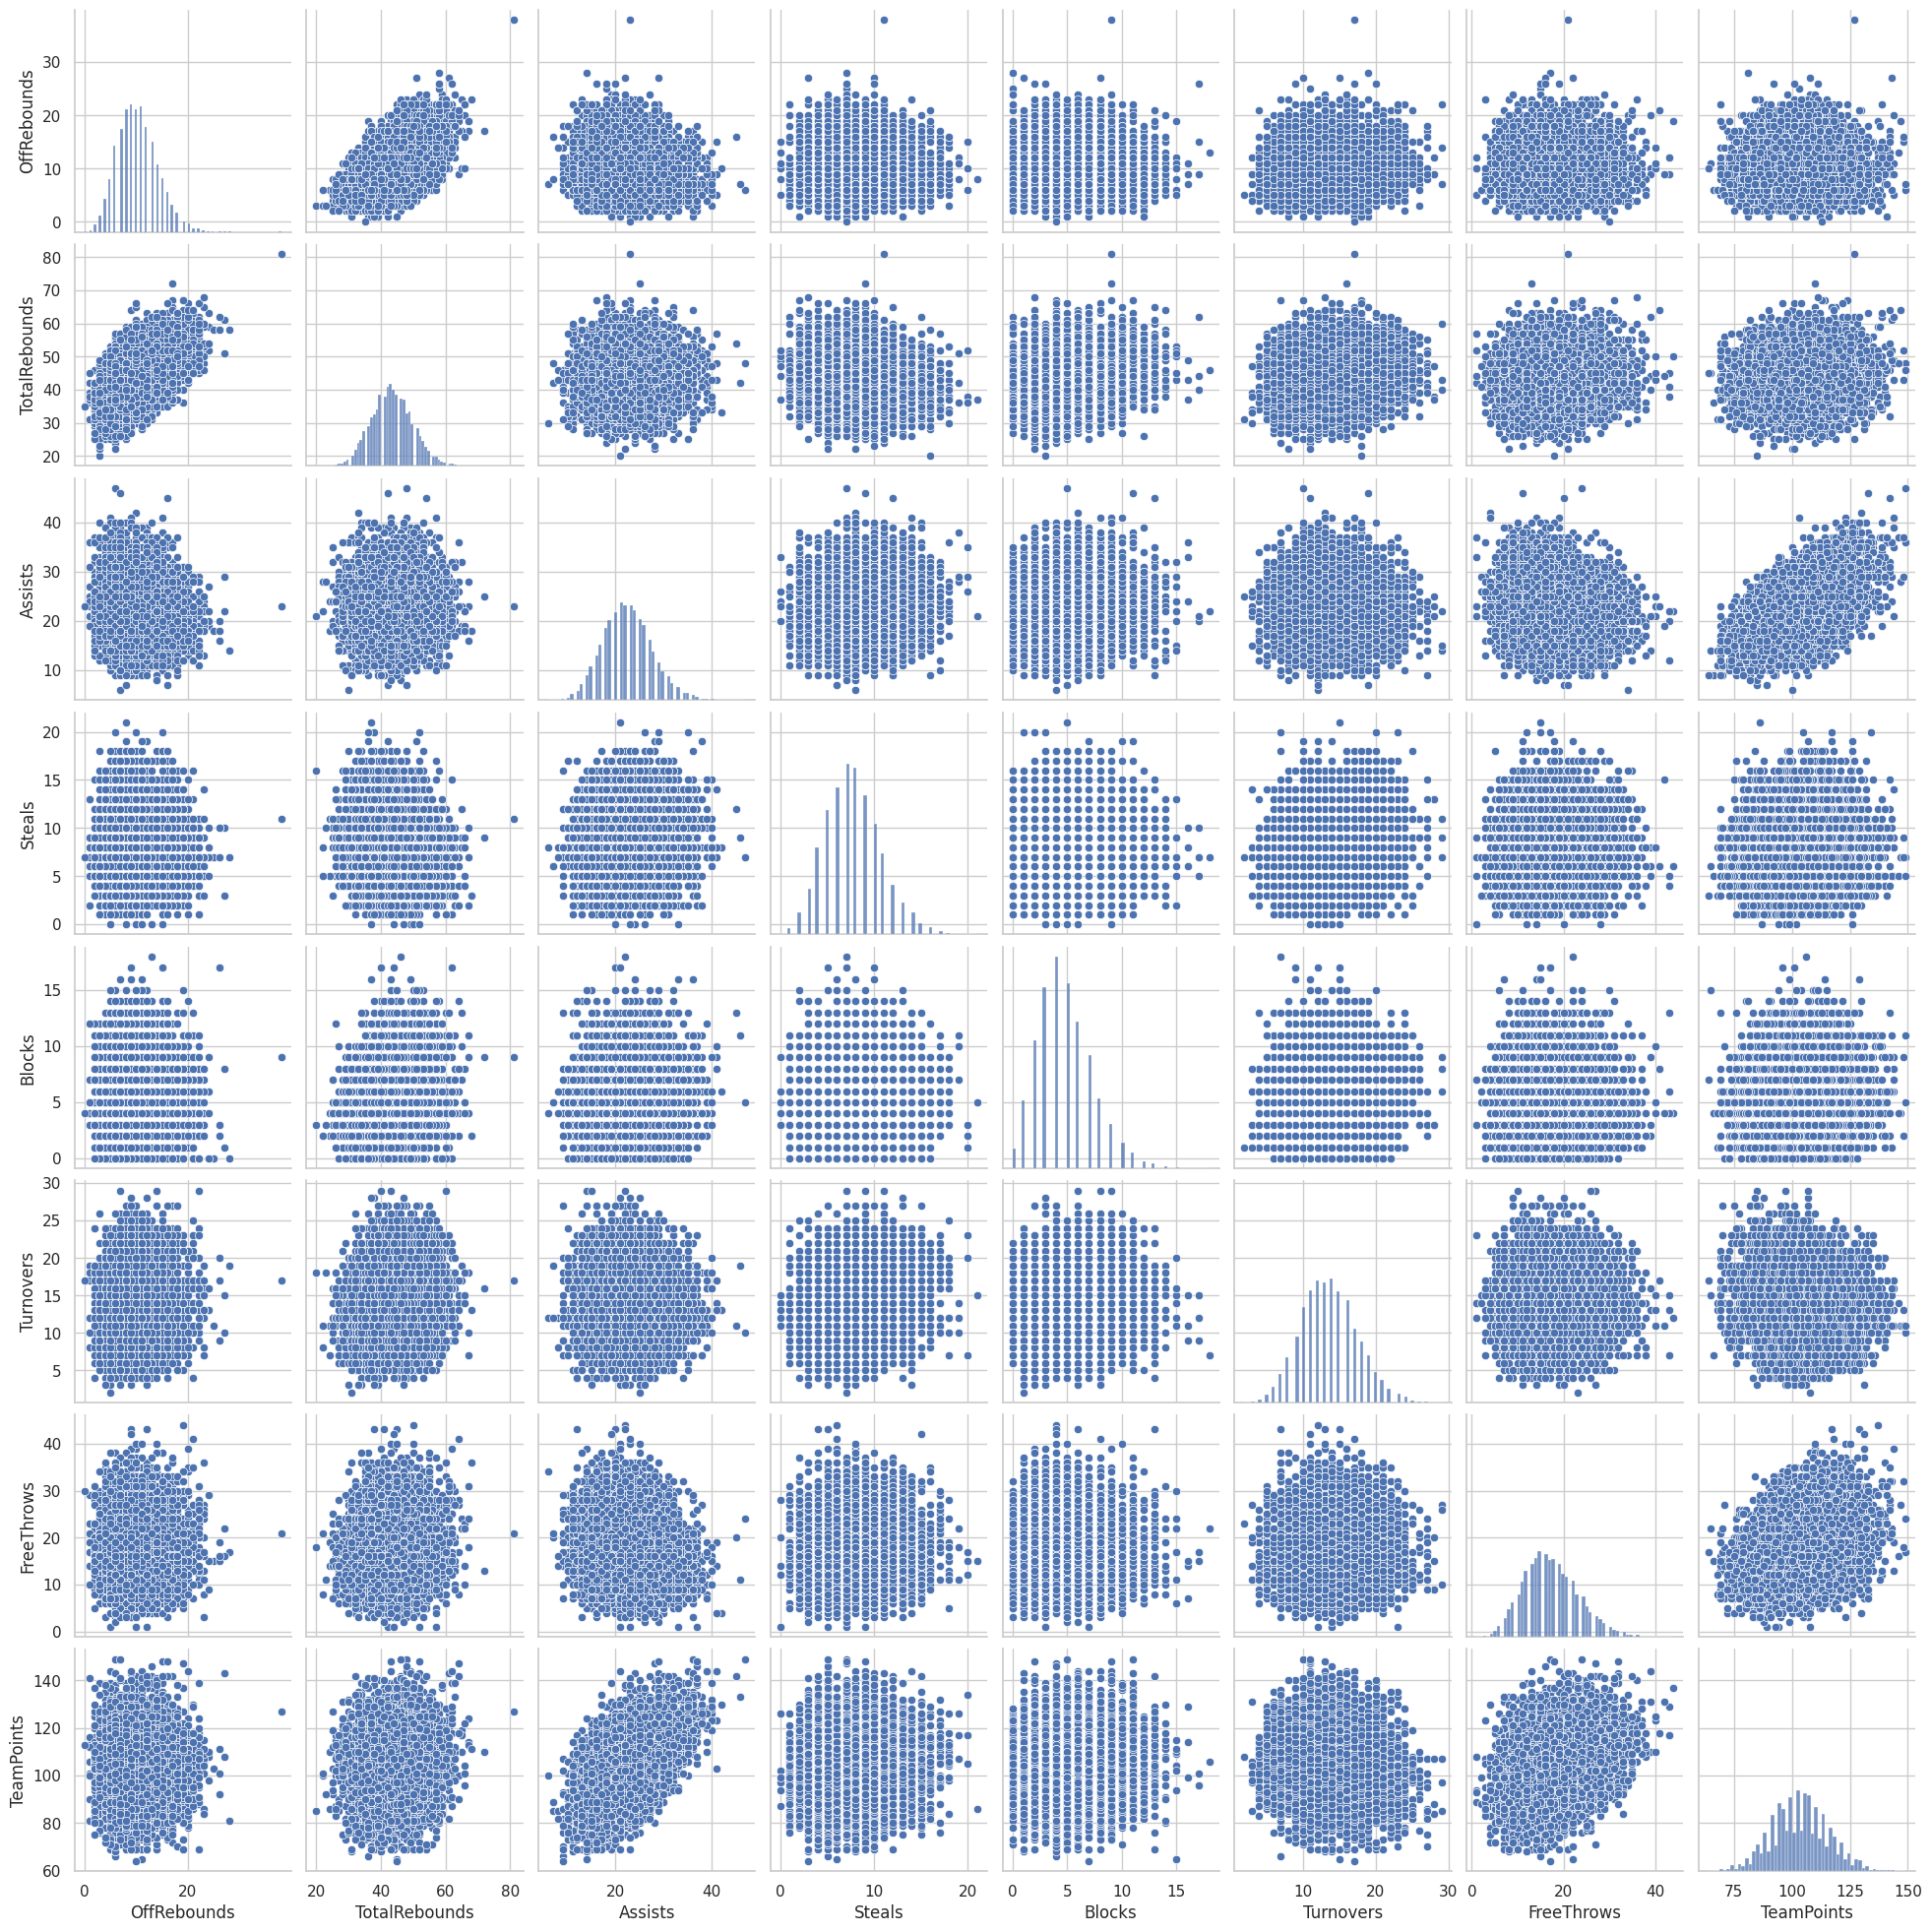

In [ ]:
basic_stats = ["OffRebounds", "TotalRebounds", "Assists", "Steals",
                       "Blocks", "Turnovers", "FreeThrows", "TeamPoints", "WINorLOSS"]

# Extracting the specified columns
basic_data = NBA[basic_stats]

sns.pairplot(basic_data)

plt.show()

In [ ]:
print(NBA[numeric_columns])

      Unnamed: 0  Game  TeamPoints  OpponentPoints  FieldGoals  \
0              1     1         102             109          40   
1              2     2         102              92          35   
2              3     3          92              94          38   
3              4     4         119             122          43   
4              5     5         103              96          33   
...          ...   ...         ...             ...         ...   
9835       78119    78         104             120          38   
9836       79119    79         115             119          47   
9837       80119    80          97             103          35   
9838       81124    81         113             101          41   
9839       82119    82          92             101          33   

      FieldGoalsAttempted  FieldGoals.  X3PointShots  X3PointShotsAttempted  \
0                      80        0.500            13                     22   
1                      69        0.507           

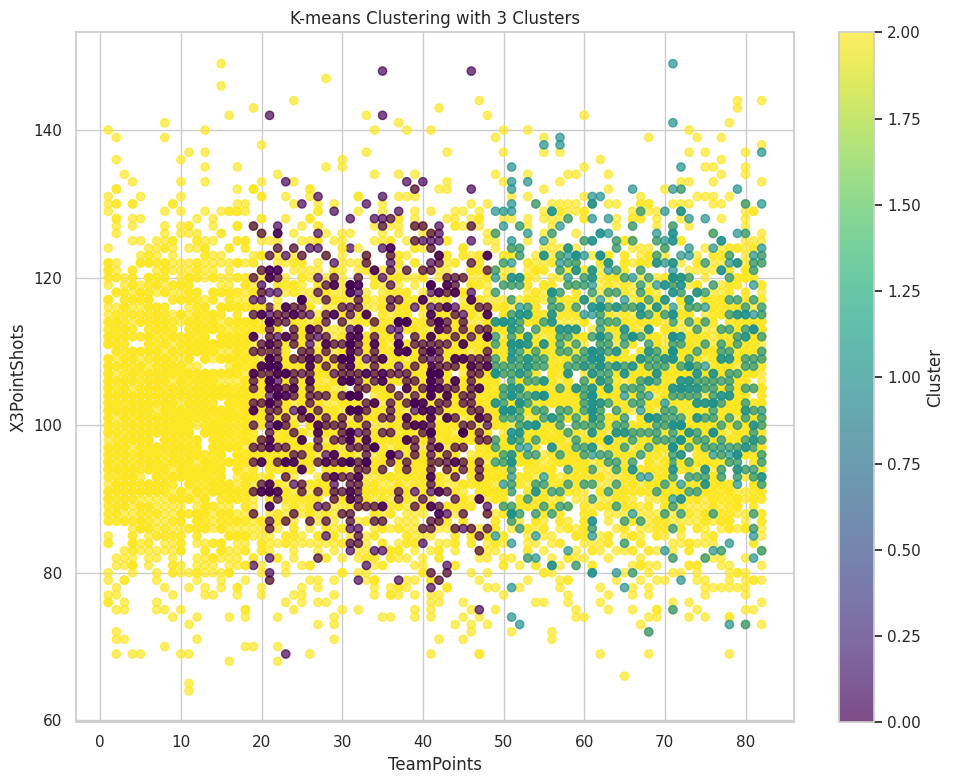

In [ ]:
from sklearn.cluster import KMeans
numeric_columns = NBA.select_dtypes(include=['number']).columns

X = NBA[numeric_columns]

kmeans = KMeans(n_clusters=3, random_state=42)
NBA['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(NBA.iloc[:, 2], NBA.iloc[:, 7], c=NBA['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel(numeric_columns[2])
plt.ylabel(numeric_columns[7])
plt.title('K-means Clustering with 3 Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming 'NBA' is your DataFrame
# Converting the 'Date' column to datetime format (if not already done)
NBA['Date'] = pd.to_datetime(NBA['Date'], errors='coerce')

# Filtering data between July 1, 2015, and July 1, 2016
start_date = '2015-07-01'
end_date = '2016-07-01'
filtered_data = NBA[(NBA['Date'] >= start_date) & (NBA['Date'] <= end_date)]

# Turning 'WINorLOSS' into binary (0 for Loss, 1 for Win)
filtered_data['WINorLOSS'] = filtered_data['WINorLOSS'].map({'W': 1, 'L': 0})

# Extracting the specified columns
basic_stats = ["OffRebounds", "TotalRebounds", "Assists", "Steals",
               "Blocks", "Turnovers", "FreeThrows", "TeamPoints", "WINorLOSS"]
basic_data = filtered_data[basic_stats]

# Displaying the first few rows of the filtered data
print(basic_data.head())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features and target variable
X = basic_data.drop(columns=['WINorLOSS'])  # Features (remove target column)
y = basic_data['WINorLOSS']                # Target variable (win/loss)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = basic_data.drop(columns=['WINorLOSS'])
y = basic_data['WINorLOSS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1, random_state=42)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Ridge Regression Results:")
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"R^2 Score: {ridge_r2:.2f}")

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("\nLasso Regression Results:")
print(f"Mean Squared Error (MSE): {lasso_mse:.2f}")
print(f"R^2 Score: {lasso_r2:.2f}")


In [ ]:
print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)
